# Part 8 -- KMeans Clustering

Prepare data for **Singular Value Decomposition (SVD)**.

### Load lib codes:

In [1]:
!pwd

/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter/ipynb


In [336]:
from os import chdir
chdir('/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter/')

from lib import *
from lib.twitter_keys import my_keys
suppress_warnings()
%matplotlib inline
from sklearn.externals import joblib

In [355]:
TSNE_SVD_tfidf_10000 = joblib.load('../predicting_stock_market_trends_with_Twitter/data/TSNE_SVD_tfidf_10000.pickle')

In [5]:
SVD_tfidf_10000 = joblib.load('../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf_10000.pickle')

In [283]:
X_tfidf_10000 = joblib.load('../predicting_stock_market_trends_with_Twitter/data/X_tfidf_10000.pickle')

In [284]:
X_tfidf = joblib.load('../predicting_stock_market_trends_with_Twitter/data/X_tfidf.pickle')

In [318]:
X = joblib.load('../predicting_stock_market_trends_with_Twitter/data/X.pickle')

In [252]:
PCA_tfidf = joblib.load('../predicting_stock_market_trends_with_Twitter/data/PCA_tfidf.pickle')

In [256]:
PCA_tfidf_10000 = joblib.load('../predicting_stock_market_trends_with_Twitter/data/PCA_tfidf_10000.pickle')

# Size issues with TSNE and 68006 rows, so had to take subsection of 10000

### Try different components for KMeans Cluster Model - on 10,000 data
K-means is a popular clustering algorithm that tries to distribute a predefined number of points (K) in a way that they end up in the center of our clusters, close to the mean, using Euclidian Distance.
We're going to create 10 clusters using MiniBatchKMeans from scikit-learn, which is a fast implementation of k-means that processes examples in small batches instead of individually.

If K=10, that means we're breaking our data into 10 different clusters and we will have 10 different means. KMeans clustering is getting the means of how many groups we think there are in the data. Evaluate how good the clustering was and picking a K that is actually useful. The means of these clusters are called centroids. They represent the mean of one of the groups in our data.

Initialize k centroids (k=10): We start out by picking 10 random data points. 

Assign data to a cluster based on distance to closest centroid: iterative algorith (loops through a for loop)
Calculate the mean of points assigned to each centroid

Repeat the previous two steps until no assignments are changed: loop through that until the means find a place where the centroids find a place where the points stop reassigning themselves. Centroids have to be learned.

# DO IT ON RAW DATA --> TFIDF TO LOGISTIC REGRESSION --> GRIDSEARCH TUNE LOG REG & TRY RF, SVC, KNN.

* THEN do a GridSearch on the best one
* THEN CIRCLE BCAK AND EDA ON CLUSTERS

In [9]:
from sklearn.cluster import KMeans, MiniBatchKMeans

# TNSE

In [356]:
# Try with TSNE_SVD_tfidf_10000:
km = KMeans(n_clusters=10, random_state=42)
km.fit(TSNE_SVD_tfidf_10000)
km_clusters = km.predict(TSNE_SVD_tfidf_10000)
km_distances = km.transform(TSNE_SVD_tfidf_10000)

In [357]:
kmeans_model = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000, random_state=42)
kmeans = kmeans_model.fit(TSNE_SVD_tfidf_10000)
kmeans_clusters = kmeans.predict(TSNE_SVD_tfidf_10000)
kmeans_distances = kmeans.transform(TSNE_SVD_tfidf_10000)

Mini Batch K-means ([11]) has been proposed as an alternative to the K-means algorithm for clustering massive
datasets. The advantage of this algorithm is to reduce the computational cost by not using all the dataset
each iteration but a subsample of a fixed size. This strategy reduces the number of distance computations per
iteration at the cost of lower cluster quality.

# SVD

In [226]:
# Try with SVD_tfidf_10000:
km = KMeans(n_clusters=10)
km.fit(SVD_tfidf_10000)
km_clusters = km.predict(SVD_tfidf_10000)
km_distances = km.transform(SVD_tfidf_10000)

In [227]:
kmeans_model = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(SVD_tfidf_10000)
kmeans_clusters = kmeans.predict(SVD_tfidf_10000)
kmeans_distances = kmeans.transform(SVD_tfidf_10000)

# PCA

In [253]:
# Try with PCA_tfidf:
km = KMeans(n_clusters=10)
km.fit(PCA_tfidf)
km_clusters = km.predict(PCA_tfidf)
km_distances = km.transform(PCA_tfidf)

In [254]:
kmeans_model = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(PCA_tfidf)
kmeans_clusters = kmeans.predict(PCA_tfidf)
kmeans_distances = kmeans.transform(PCA_tfidf)

In [257]:
# Try with PCA_tfidf:
km = KMeans(n_clusters=10)
km.fit(PCA_tfidf_10000)
km_clusters = km.predict(PCA_tfidf_10000)
km_distances = km.transform(PCA_tfidf_10000)

In [258]:
kmeans_model = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(PCA_tfidf_10000)
kmeans_clusters = kmeans.predict(PCA_tfidf_10000)
kmeans_distances = kmeans.transform(PCA_tfidf_10000)

# X

In [299]:
# Try with X_tfidf:
km = KMeans(n_clusters=10)
km.fit(X_tfidf_10000)
km_clusters = km.predict(X_tfidf_10000)
km_distances = km.transform(X_tfidf_10000)

In [300]:
kmeans_model = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(X_tfidf_10000)
kmeans_clusters = kmeans.predict(X_tfidf_10000)
kmeans_distances = kmeans.transform(X_tfidf_10000)

# TNSE

In [358]:
from sklearn.metrics import silhouette_score, silhouette_samples

Not batching performs slightly better:

In [88]:
#returns the average silhouette score for your dataset
silhouette_score(TSNE_SVD_tfidf_10000, km.labels_)
#.37 is somewhat close to 1, meaning it is somewhat close to the centroid.

0.37497295551059179

In [89]:
silhouette_score(TSNE_SVD_tfidf_10000, kmeans_model.labels_)

0.37475958554600147

In [359]:
# random state, 2 dimensions
silhouette_score(TSNE_SVD_tfidf_10000, km.labels_)
#.37 is somewhat close to 1, meaning it is somewhat close to the centroid.

0.37457231454535334

In [360]:
silhouette_score(TSNE_SVD_tfidf_10000, kmeans_model.labels_)

0.35000423678321768

# SVD

In [228]:
#returns the average silhouette score for your dataset
silhouette_score(SVD_tfidf_10000, km.labels_)
#.25-.13

0.1390517001719756

In [230]:
silhouette_score(SVD_tfidf_10000, kmeans_model.labels_)

0.10234586688416673

# PCA

In [261]:
#returns the average silhouette score for your dataset
silhouette_score(PCA_tfidf_10000, km.labels_)
#.14

0.14771352010497465

In [262]:
silhouette_score(PCA_tfidf_10000, kmeans_model.labels_)

0.20871600402999871

# X

In [145]:
#returns the average silhouette score for your dataset
silhouette_score(X_tfidf_10000, km.labels_)
#.21

0.021199674096412269

In [146]:
silhouette_score(X_tfidf_10000, kmeans_model.labels_)

0.018266379647914735

In [249]:
#returns the average silhouette score for your dataset
silhouette_score(X_tfidf_10000, km.labels_)
#.22

0.022024015366812606

In [250]:
silhouette_score(X_tfidf_10000, kmeans_model.labels_)

0.017255362074262256

SVD - which words make up axis 1, etc. look at components. 

# TNSE - ALL

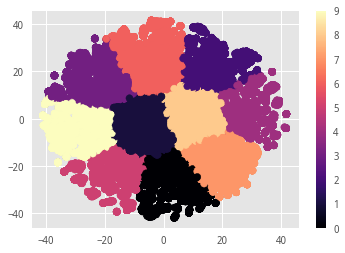

In [61]:
plt.scatter(TSNE_SVD_tfidf[:,0], TSNE_SVD_tfidf[:,1], c=km.labels_, cmap='magma')
plt.colorbar()

# TNSE

In [361]:
TSNE_SVD_tfidf_10000.shape

(10000, 2)

In [177]:
km.labels_.shape

(10000,)

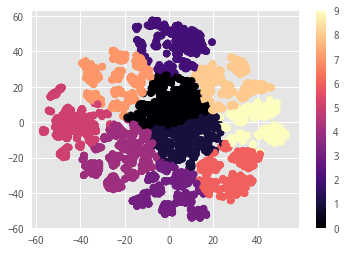

In [362]:
# random state, 2 dimensions
plt.scatter(TSNE_SVD_tfidf_10000[:,0], TSNE_SVD_tfidf_10000[:,1], c=km.labels_, cmap='magma')
plt.colorbar()

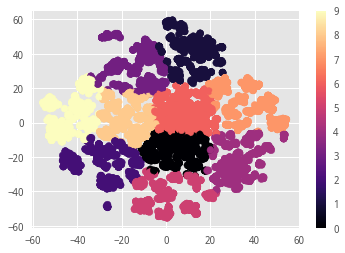

In [45]:
plt.scatter(TSNE_SVD_tfidf_10000[:,0], TSNE_SVD_tfidf_10000[:,1], c=km.labels_, cmap='magma')
plt.colorbar()

# SVD

In [170]:
SVD_tfidf_10000.shape

(10000, 50)

In [173]:
km.labels_.shape

(10000,)

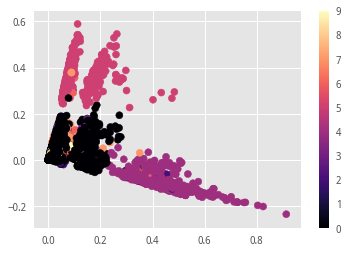

In [108]:
plt.scatter(SVD_tfidf_10000[:,0], SVD_tfidf_10000[:,1], c=km.labels_, cmap='magma')
plt.colorbar()

# PCA

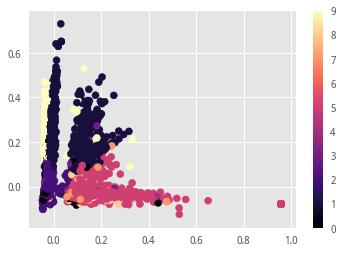

In [245]:
plt.scatter(PCA_tfidf[:,0], PCA_tfidf[:,1], c=km.labels_, cmap='magma')
plt.colorbar()

The k-means algorithm runs for a few hundred iterations until the centroids don't improve much any more, and then for each tweet, it provides us with the closest centroid and the distance to each cluster centroid.
Let's see which cluster the first five tweets – that we saw earlier – have ended up in:

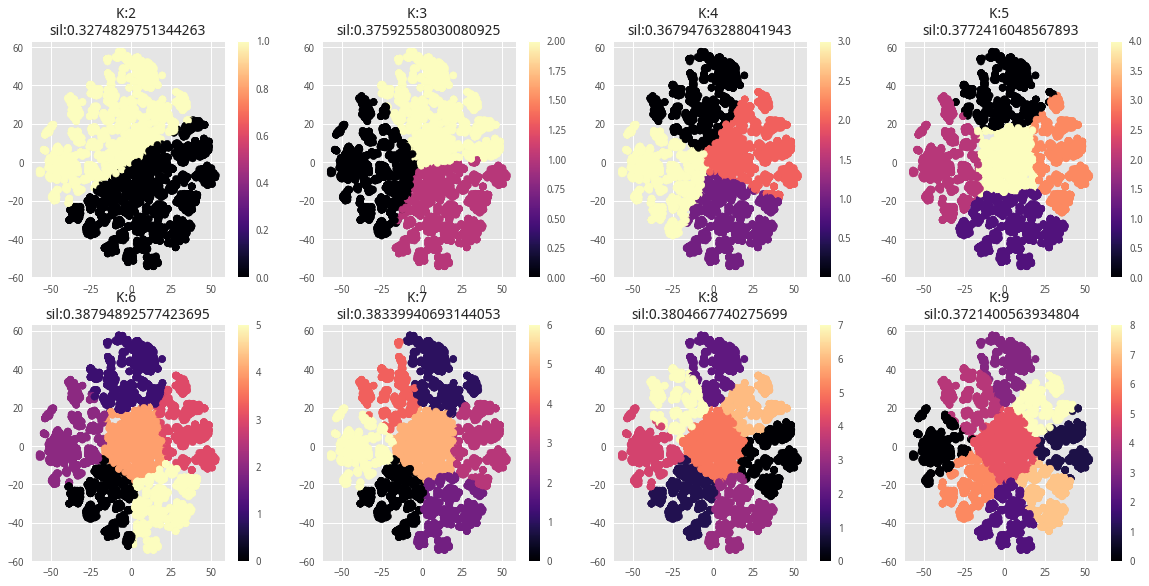

In [364]:
# random state, 2 dimensions
ks = []
sils = []
plt.figure(figsize=(20,20))
for i,k  in enumerate(range(2,10)):
    km = KMeans(n_clusters=k)
    km.fit(TSNE_SVD_tfidf_10000)
    plt.subplot(4,4,1+i)
    plt.scatter(TSNE_SVD_tfidf_10000.T[0], TSNE_SVD_tfidf_10000.T[1], c=km.labels_, cmap='magma')
    plt.title('K:{} \nsil:{}'.format(k, silhouette_score(TSNE_SVD_tfidf_10000, km.labels_)))
    plt.colorbar()
    ks.append(k)
    sils.append(silhouette_score(TSNE_SVD_tfidf_10000, km.labels_))

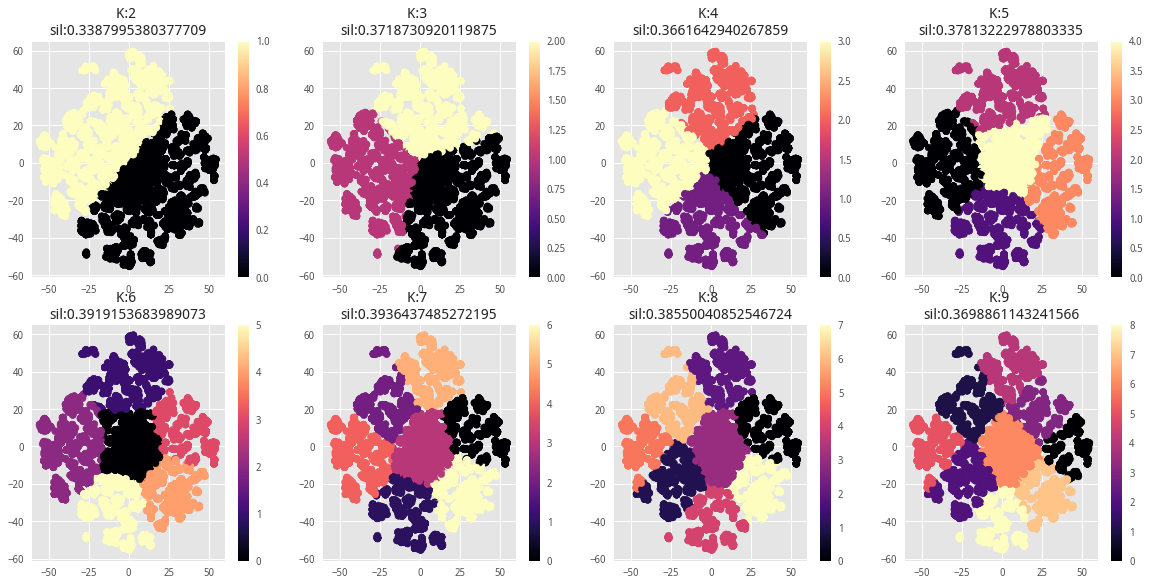

In [281]:
# ks = []
# sils = []
# plt.figure(figsize=(20,20))
# for i,k  in enumerate(range(2,10)):
#     km = KMeans(n_clusters=k)
#     km.fit(TSNE_SVD_tfidf_10000)
#     plt.subplot(4,4,1+i)
#     plt.scatter(TSNE_SVD_tfidf_10000.T[0], TSNE_SVD_tfidf_10000.T[1], c=km.labels_, cmap='magma')
#     plt.title('K:{} \nsil:{}'.format(k, silhouette_score(TSNE_SVD_tfidf_10000, km.labels_)))
#     plt.colorbar()
#     ks.append(k)
#     sils.append(silhouette_score(TSNE_SVD_tfidf_10000, km.labels_))

### Plot the silhouette score for different values of K. Is this suggest a clear winner?

**HINT**: Pay attention to the ***X and Y scale*** of your plot.

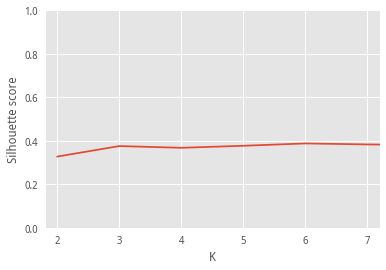

In [366]:
# random state, 2 dimensions
plt.plot(ks, sils)
plt.ylim(0,1)
plt.xlim(1.8,7.2)
plt.xlabel('K')
plt.ylabel('Silhouette score')

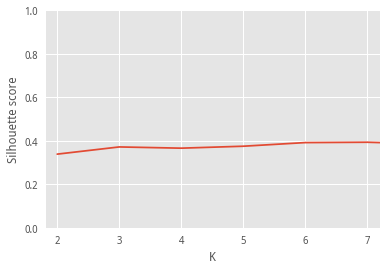

In [279]:
# plt.plot(ks, sils)
# plt.ylim(0,1)
# plt.xlim(1.8,7.2)
# plt.xlabel('K')
# plt.ylabel('Silhouette score')

Now let's try and visualize the tweets again, according to their distance from each centroid in our K clusters. We are going to use t-SNE again to reduce the dimensionality from 10 (we had 10 clusters/centroids) down to 2.

In [370]:
tsne_kmeans = kmeans_model.fit_transform(kmeans_distances[:10000])

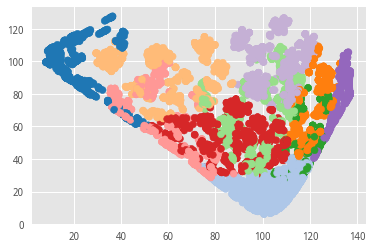

In [372]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

plt.scatter(tsne_kmeans[:,0], tsne_kmeans[:,1], c=colormap[kmeans_clusters][:10000])

<s>With 100 SVD n_components, we can only account for 6% of the variance in the data. We need more. 
With 300 SVD n_components, we can only account for 11% of the variance in the data. **Go back and clean data to see if we get better?**</s><br>
With 300 SVD n_components, we can account for 29% of the variance in the data.
With 200 SVD n_components, we can account for 22% of the variance in the data. 

In [ ]:
WORD2VEC + GOOGLE SEARCH --> try this after TFIDF